In [17]:
# Libraries
import datetime
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller  # Augmented Dickey Fuller test for stationarity
from pmdarima.arima import auto_arima

In [18]:
end = datetime.datetime.now()
timedelta = datetime.timedelta(365 * 2)  # 2 years
start = end - timedelta

df = yf.download(["BTC-USD", "ETH-USD"], start, end)["Adj Close"]
df.columns = ["BTC", "ETH"]
df["ETH/BTC"] = df["ETH"] / df["BTC"]
df["ethbtc_pct_change"] = df["ETH/BTC"].pct_change()
df = df.dropna()
df

[*********************100%%**********************]  2 of 2 completed


,BTC,ETH,ETH/BTC,ethbtc_pct_change
Date,,,,
2021-12-09,47672.121094,4119.815918,0.086420,-0.016836
2021-12-10,47243.304688,3908.496094,0.082731,-0.042682
2021-12-11,49362.507812,4084.452393,0.082744,0.000155
2021-12-12,50098.335938,4134.453125,0.082527,-0.002626
2021-12-13,46737.480469,3784.226807,0.080968,-0.018891
...,...,...,...,...
2023-12-04,41980.097656,2243.215820,0.053435,-0.026183
2023-12-05,44080.648438,2293.841797,0.052037,-0.026159
2023-12-06,43746.445312,2231.661377,0.051014,-0.019675


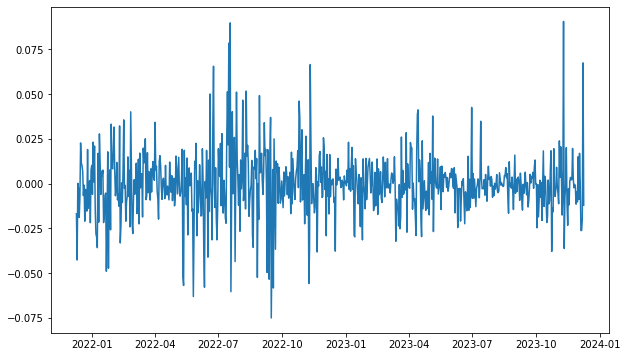

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(df["ethbtc_pct_change"])

In [20]:
# Conduct Augmented Dickey Fuller test to check for stationarity
adftest = adfuller(df["ethbtc_pct_change"])
adftest[1]  # p < 0.05, time series is stationary.

9.920262296513241e-28

In [21]:
aarima = auto_arima(df["ethbtc_pct_change"], start_p=0, start_d=0, start_q=0, max_p=3, max_d=1, max_q=3, trace=True, with_intercept=False)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-3801.845, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-3800.018, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-3800.034, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-3789.727, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-3800.447, Time=0.09 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.296 seconds
